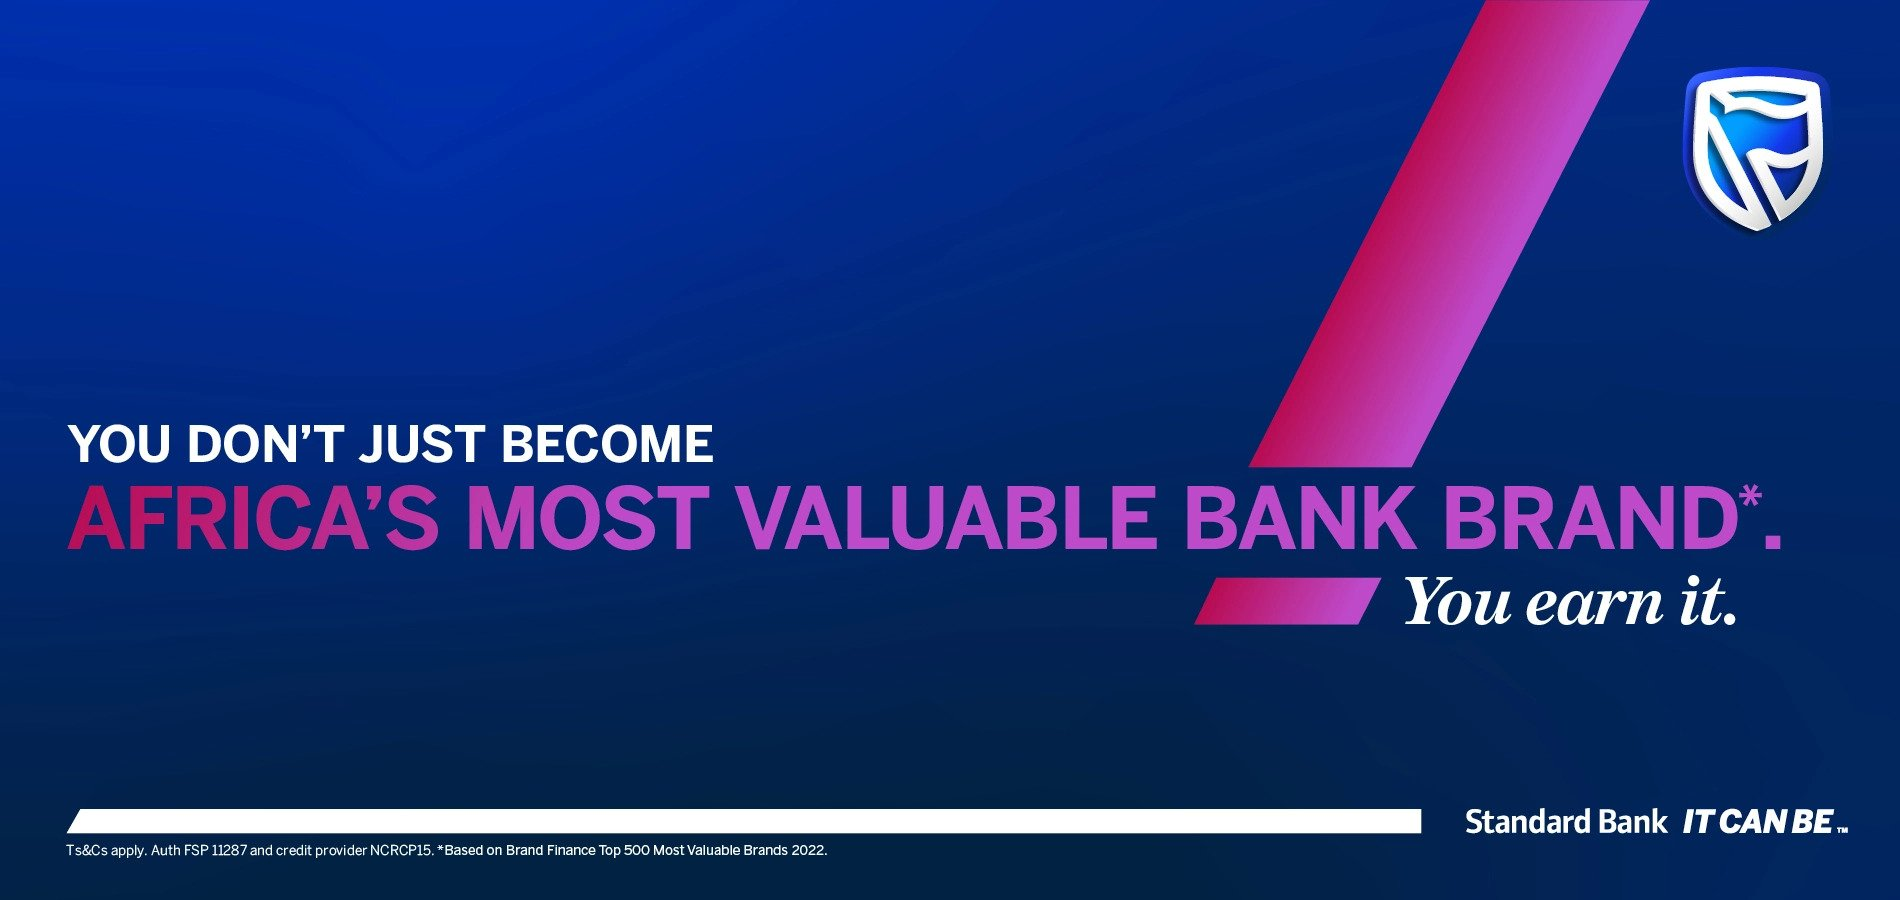

# CLASSIFICATION Predict customers who are likely to default on their loan

© Standard Bank - Case study

---
### Full Name and Employee number
Sinethemba Nongqoto

A250949


### Problem Statement

Once upon a time, there was a bank offering services to private persons. The services include managing of accounts, offering loans, etc. The bank wants to improve their services by finding interesting groups of clients (e.g. to differentiate between good and bad clients). The bank managers have only vague idea, who is good client (whom to offer some additional services) and who is bad client (whom to watch carefully to minimize the bank loses). 

### Data overview

The bank stores data about their clients, the accounts (transactions within several months), the loans already granted, the credit cards issued So the bank managers hope to find some answers (and questions as well) by analyzing this data.

Class Description on Target variable

* 1: Client defaulted on a loan
* 0: Client did not default

### Objective:

The objective is to build the optimal machine learning model to maximize predictive capability while decreasing the risk of future loan defaults. 


<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Cleaning</a>

<a href=#five>5. Feature selection and feature engineering</a>

<a href=#seven>6. Model development, performance and interpretation</a>

<a href=#seven>7. Conclusion</a>


<a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :---------------------------------------------- |
|  |

---

# Import all the  **libraries**

In [1]:
# Data analysis and wrangling libraries
import pandas as pd
import numpy as np
import pingouin as pg
# Visualisations
import seaborn as sns
import matplotlib.pyplot as plt

# Modelling
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.utils import resample

from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
import joblib
from category_encoders import BinaryEncoder
# Metrics for Model Evaluation

from sklearn.metrics import precision_score,recall_score,accuracy_score,roc_auc_score,roc_curve
from sklearn.metrics import confusion_matrix,auc,r2_score,f1_score,plot_confusion_matrix,plot_roc_curve,plot_precision_recall_curve

<a id="two"></a>
## 2. Loading Data
<a href=#cont>Back to Table of Contents</a>

---

In [2]:
# Load data
df= pd.read_excel('app_data.xlsx')


<a id="four"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    

### Taking a peak through the data by viewing the first 10 rows of the table

In [3]:
#To view the first 10 row of the data to see how it looks like
df.head(10)

,DEF_TARGET,FLAG_OWN_CAR,NAME_EDUCATION_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,OWN_CAR_AGE,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,NAME_HOUSING_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT
0,1,N,Secondary / secondary special,-9461,-637,NaN,Business Entity Type 3,0.083037,0.262949,0.139376,House / apartment,2.0,2.0,-1134.0,0.0,0.0,0.0
1,0,N,Higher education,-16765,-1188,NaN,School,0.311267,0.622246,NaN,House / apartment,1.0,0.0,-828.0,0.0,0.0,0.0
2,0,Y,Secondary / secondary special,-19046,-225,26.0,Government,NaN,0.555912,0.729567,House / apartment,0.0,0.0,-815.0,0.0,0.0,0.0
3,0,N,Secondary / secondary special,-19005,-3039,NaN,Business Entity Type 3,NaN,0.650442,NaN,House / apartment,2.0,0.0,-617.0,NaN,NaN,NaN
4,0,N,Secondary / secondary special,-19932,-3038,NaN,Religion,NaN,0.322738,NaN,House / apartment,0.0,0.0,-1106.0,0.0,0.0,0.0
5,0,N,Secondary / secondary special,-16941,-1588,NaN,Other,NaN,0.354225,0.621226,House / apartment,0.0,0.0,-2536.0,0.0,0.0,1.0
6,0,Y,Higher education,-13778,-3130,17.0,Business Entity Type 3,0.774761,0.724000,0.492060,House / apartment,1.0,0.0,-1562.0,0.0,1.0,1.0
7,0,Y,Higher education,-18850,-449,8.0,Other,NaN,0.714279,0.540654,House / apartment,2.0,0.0,-1070.0,0.0,0.0,0.0
8,0,N,Secondary / secondary special,-20099,365243,NaN,XNA,0.587334,0.205747,0.751724,House / apartment,1.0,0.0,0.0,0.0,0.0,0.0
9,0,N,Secondary / secondary special,-14469,-2019,NaN,Electricity,NaN,0.746644,NaN,House / apartment,2.0,0.0,-1673.0,NaN,NaN,NaN


### Understanding the dataset

In [4]:
# checking the shape of the data
print('shape:',df.shape)

shape: (307511, 17)


On the provided we have 307511 rows with 17 columns, Out of 17 features, 16 are input features and 1 is output feature (Def_target).

In [5]:
#Now we check the data types of the schema.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 17 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   DEF_TARGET                  307511 non-null  int64  
 1   FLAG_OWN_CAR                307511 non-null  object 
 2   NAME_EDUCATION_TYPE         307511 non-null  object 
 3   DAYS_BIRTH                  307511 non-null  int64  
 4   DAYS_EMPLOYED               307511 non-null  int64  
 5   OWN_CAR_AGE                 104582 non-null  float64
 6   ORGANIZATION_TYPE           307511 non-null  object 
 7   EXT_SOURCE_1                134133 non-null  float64
 8   EXT_SOURCE_2                306851 non-null  float64
 9   EXT_SOURCE_3                246546 non-null  float64
 10  NAME_HOUSING_TYPE           307511 non-null  object 
 11  OBS_30_CNT_SOCIAL_CIRCLE    306490 non-null  float64
 12  DEF_30_CNT_SOCIAL_CIRCLE    306490 non-null  float64
 13  DAYS_LAST_PHON

So, we see that the majority of features are numeric and few are string, so they are categorical features. 

### Checking the distribution of the target variable

In [6]:
default = df['DEF_TARGET'].value_counts().to_frame().rename(columns = {"DEF_TARGET": "Count"})

default["percent"] = (default.apply(lambda x: x/x.sum()*100).round(2))

display(default)

,Count,percent
0,282686,91.93
1,24825,8.07


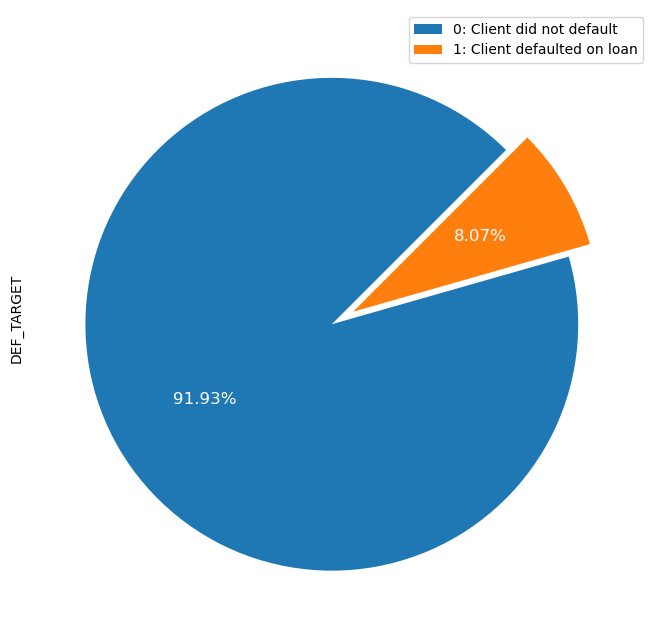

In [7]:
#pie chart visaualization
 
df.DEF_TARGET.value_counts().plot(kind='pie', subplots=True, autopct='%1.2f%%', explode= (0.05, 0.05), startangle=45, legend=True, fontsize=12, figsize=(16,8), textprops={'color':"white"})

plt.legend(["0: Client did not default","1: Client defaulted on loan"]);

By looking at the distribution of DEF_TARGET we can clearly see that we our data dataset is heavily imbalanced since the number of clients who did not default on a loan is over 90% while those who defaulted on a loan is less than 10%. But this will be corrected in the feature engineering section.

### Checking for the feature value distribution

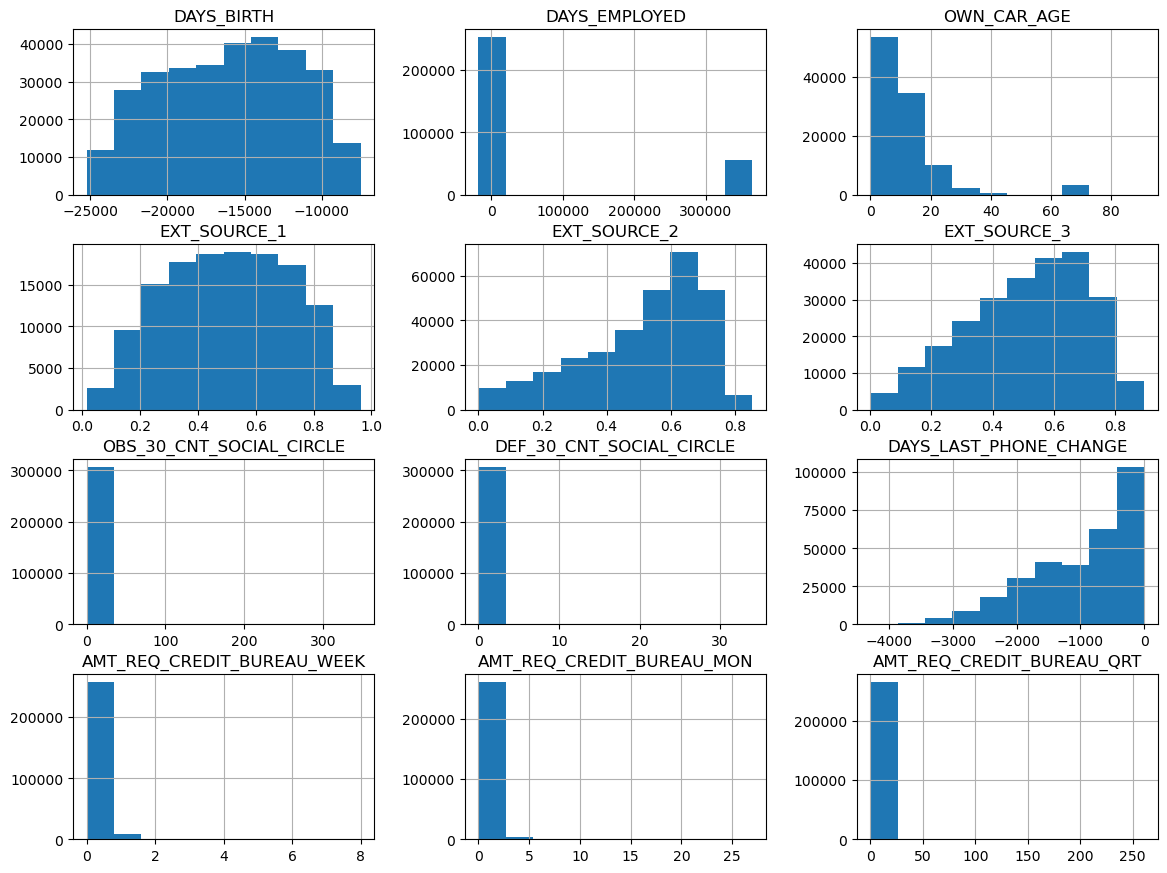

In [8]:
# exclude the target value which is column DEF_TARGET
df1= df.loc[:, df.columns != 'DEF_TARGET']
df1.hist(figsize =(14,44), layout=(16,3))
plt.show()

### Visualization of the categoric distribution:

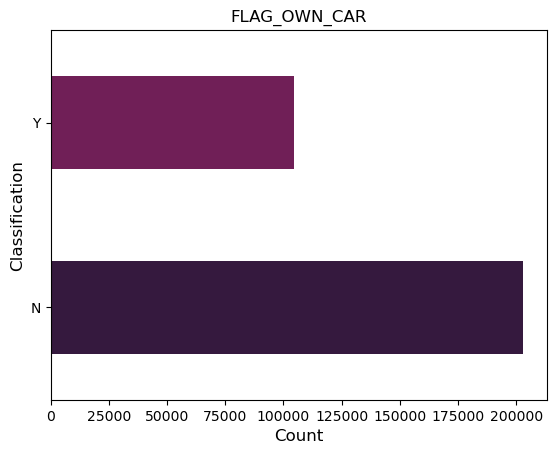

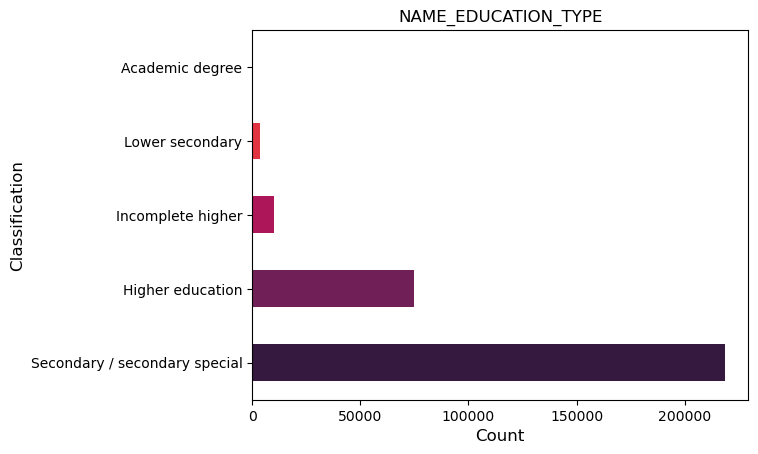

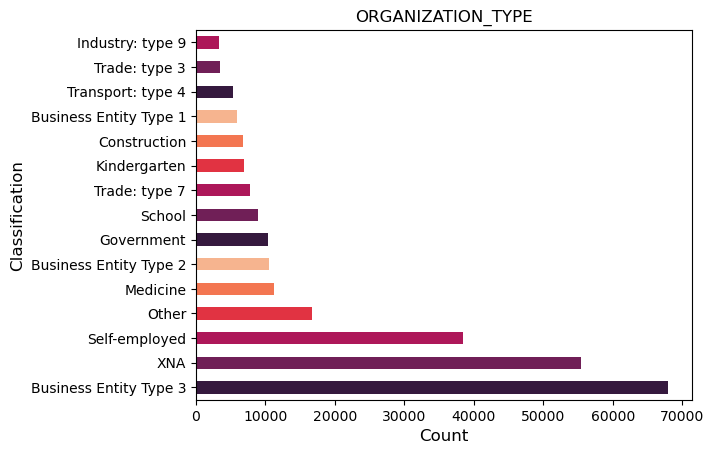

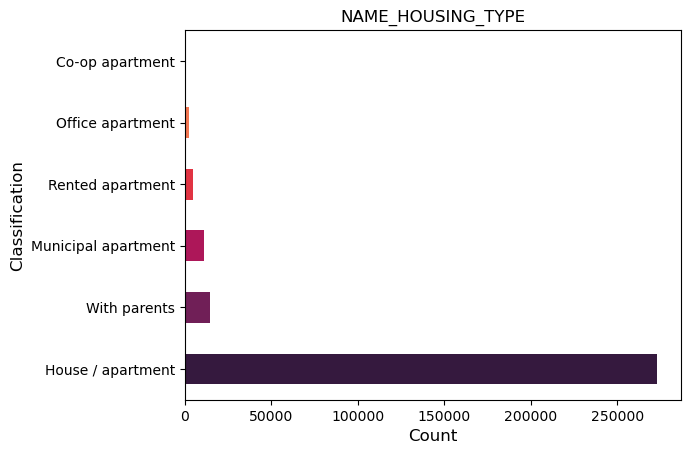

In [9]:
for col in df.select_dtypes(include=["object"]).columns:
    df[col].value_counts()[:15].plot(kind="barh", color=sns.color_palette("rocket"))
    
    
    plt.xlabel("Count", fontsize=12)
    plt.xticks(rotation=0, horizontalalignment="center")
    plt.ylabel("Classification", fontsize=12)
    plt.title(col, fontsize=12, loc="center")
    plt.show()

In [10]:

# Variable vs. target chart
def target(x):
    short_0 = df[df.DEF_TARGET == 0].loc[:,x]
    short_1 = df[df.DEF_TARGET == 1].loc[:,x]
    
    a = np.array(short_0)
    b = np.array(short_1)
    
    np.warnings.filterwarnings('ignore')
    
    plt.hist(a, bins=40, density=True, color="g", alpha = 0.6, label='Client did not default', align="left")
    plt.hist(b, bins=40, density=True, color="r", alpha = 0.6, label='Client defaulted on a loan', align="right")
    plt.legend(loc='upper right')
    plt.title(x, fontsize=12, loc="right")
    plt.xticks(rotation=90, horizontalalignment="center")
    plt.xlabel('Classification', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.show()

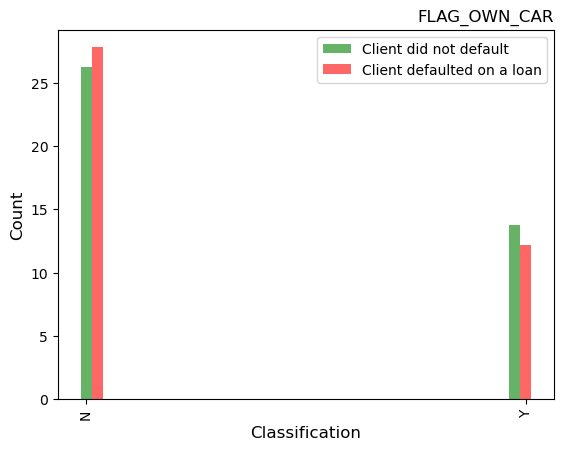

In [11]:
# understand how many client with/without cars defaulted/did not default on a loan
target("FLAG_OWN_CAR")

From the visualization above we can see most clients with no cars are likely to default on a loan than clients with cars.

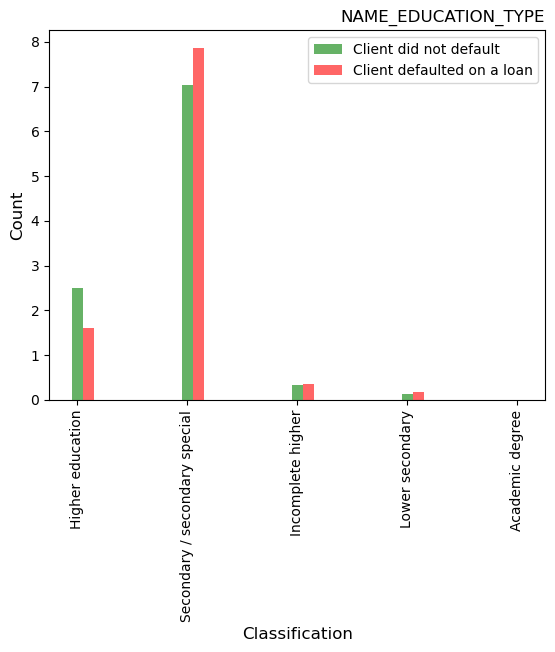

In [12]:
# understand how many client with education type defaulted/did not default on a loan
target("NAME_EDUCATION_TYPE")

Clients with Secondary/secondary special are the highest in terms of loan applications and they most likely to default (high risks) while people people with Higher education are not likely to default.

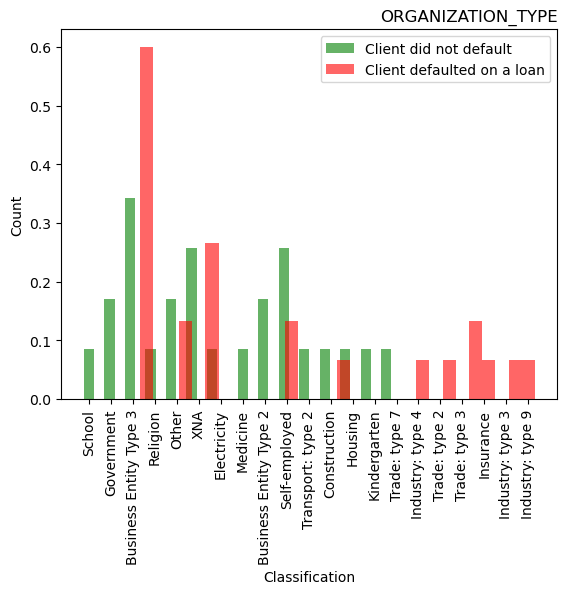

In [13]:
def targeth(x):
    short_0 = df[df.DEF_TARGET == 0].loc[:,x]
    short_1 = df[df.DEF_TARGET == 1].loc[:,x]
    
    a = np.array(short_0)
    b = np.array(short_1)
    
    np.warnings.filterwarnings('ignore')
    
    plt.hist(a[:25], bins=30, density=True, color="g", alpha = 0.6, label='Client did not default', align="left")
    plt.hist(b[:25], bins=30, density=True, color="r", alpha = 0.6, label='Client defaulted on a loan', align="right")
    plt.legend(loc='upper right')
    plt.title(x, fontsize=12, loc="right")
    plt.xticks(rotation=90, horizontalalignment="center")
    plt.xlabel('Classification')
    plt.ylabel('Count')
    plt.show()
    
targeth("ORGANIZATION_TYPE")

From the observations most of the clients that work in Religion are most likely to default as well as in electricity (Flag as high risk) followered by Self employed and insurance Clients

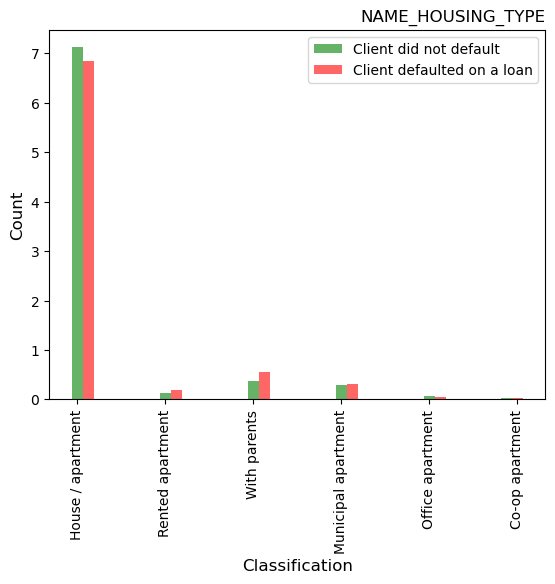

In [14]:
# understand how many client with organization type defaulted/did not default on a loan
target("NAME_HOUSING_TYPE")

Clients that live with their parents are likely to default while clients that live in their house/apartments are loo risks

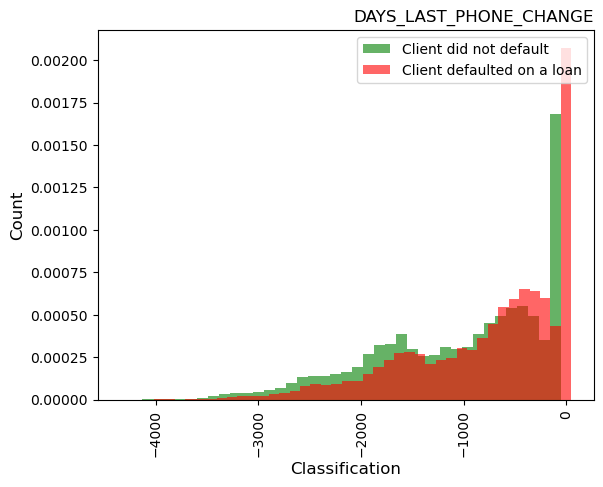

In [15]:
# understand how many client that changed their numbers defaulted/not default on a loan
target("DAYS_LAST_PHONE_CHANGE")

People who recently changed or fruequently change their are high risks as they are the ones who are defaulting the most of their loans  

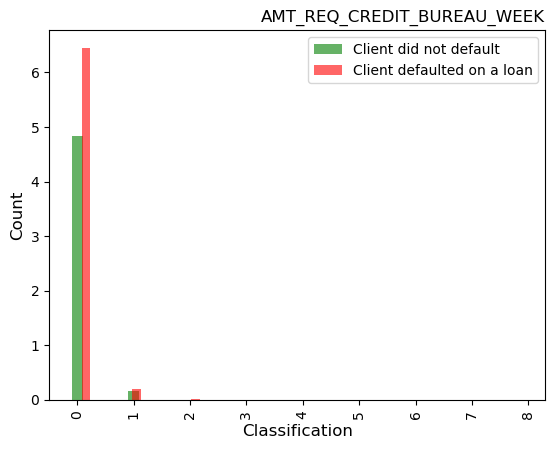

In [16]:
# understand how many enquires client made before loan application in a week time defaulted/not defaulted on a loan
target("AMT_REQ_CREDIT_BUREAU_WEEK")

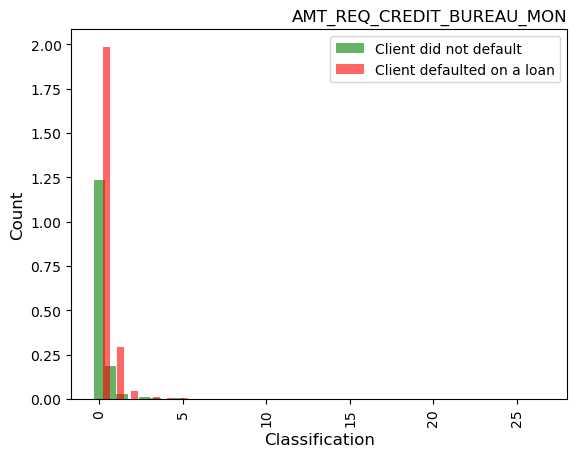

In [17]:
# understand how many enquires client made before loan application in a month time defaulted/not defaulted on a loan
target("AMT_REQ_CREDIT_BUREAU_MON")

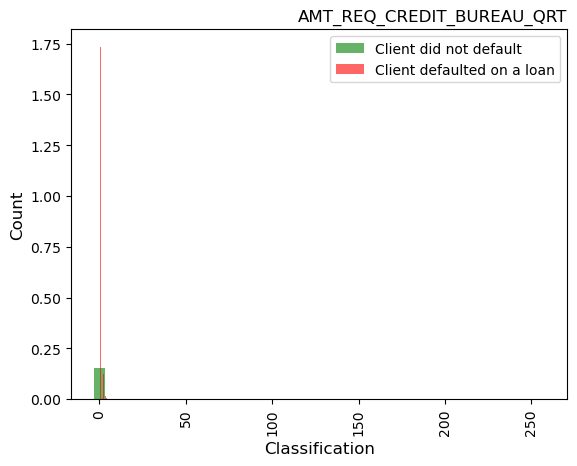

In [18]:
# understand how many enquires client made before loan application in a 3 month period time defaulted/not defaulted on a loan
target("AMT_REQ_CREDIT_BUREAU_QRT")

### OUTLIERS

Let’s examine the data and check for any outliers.
Starting by selecting and filtering numeric and categoric data.

In [19]:
data_categ = df.select_dtypes(exclude=["int64","float64"]).copy()
data_num = df.select_dtypes(exclude=["object","category"]).copy()

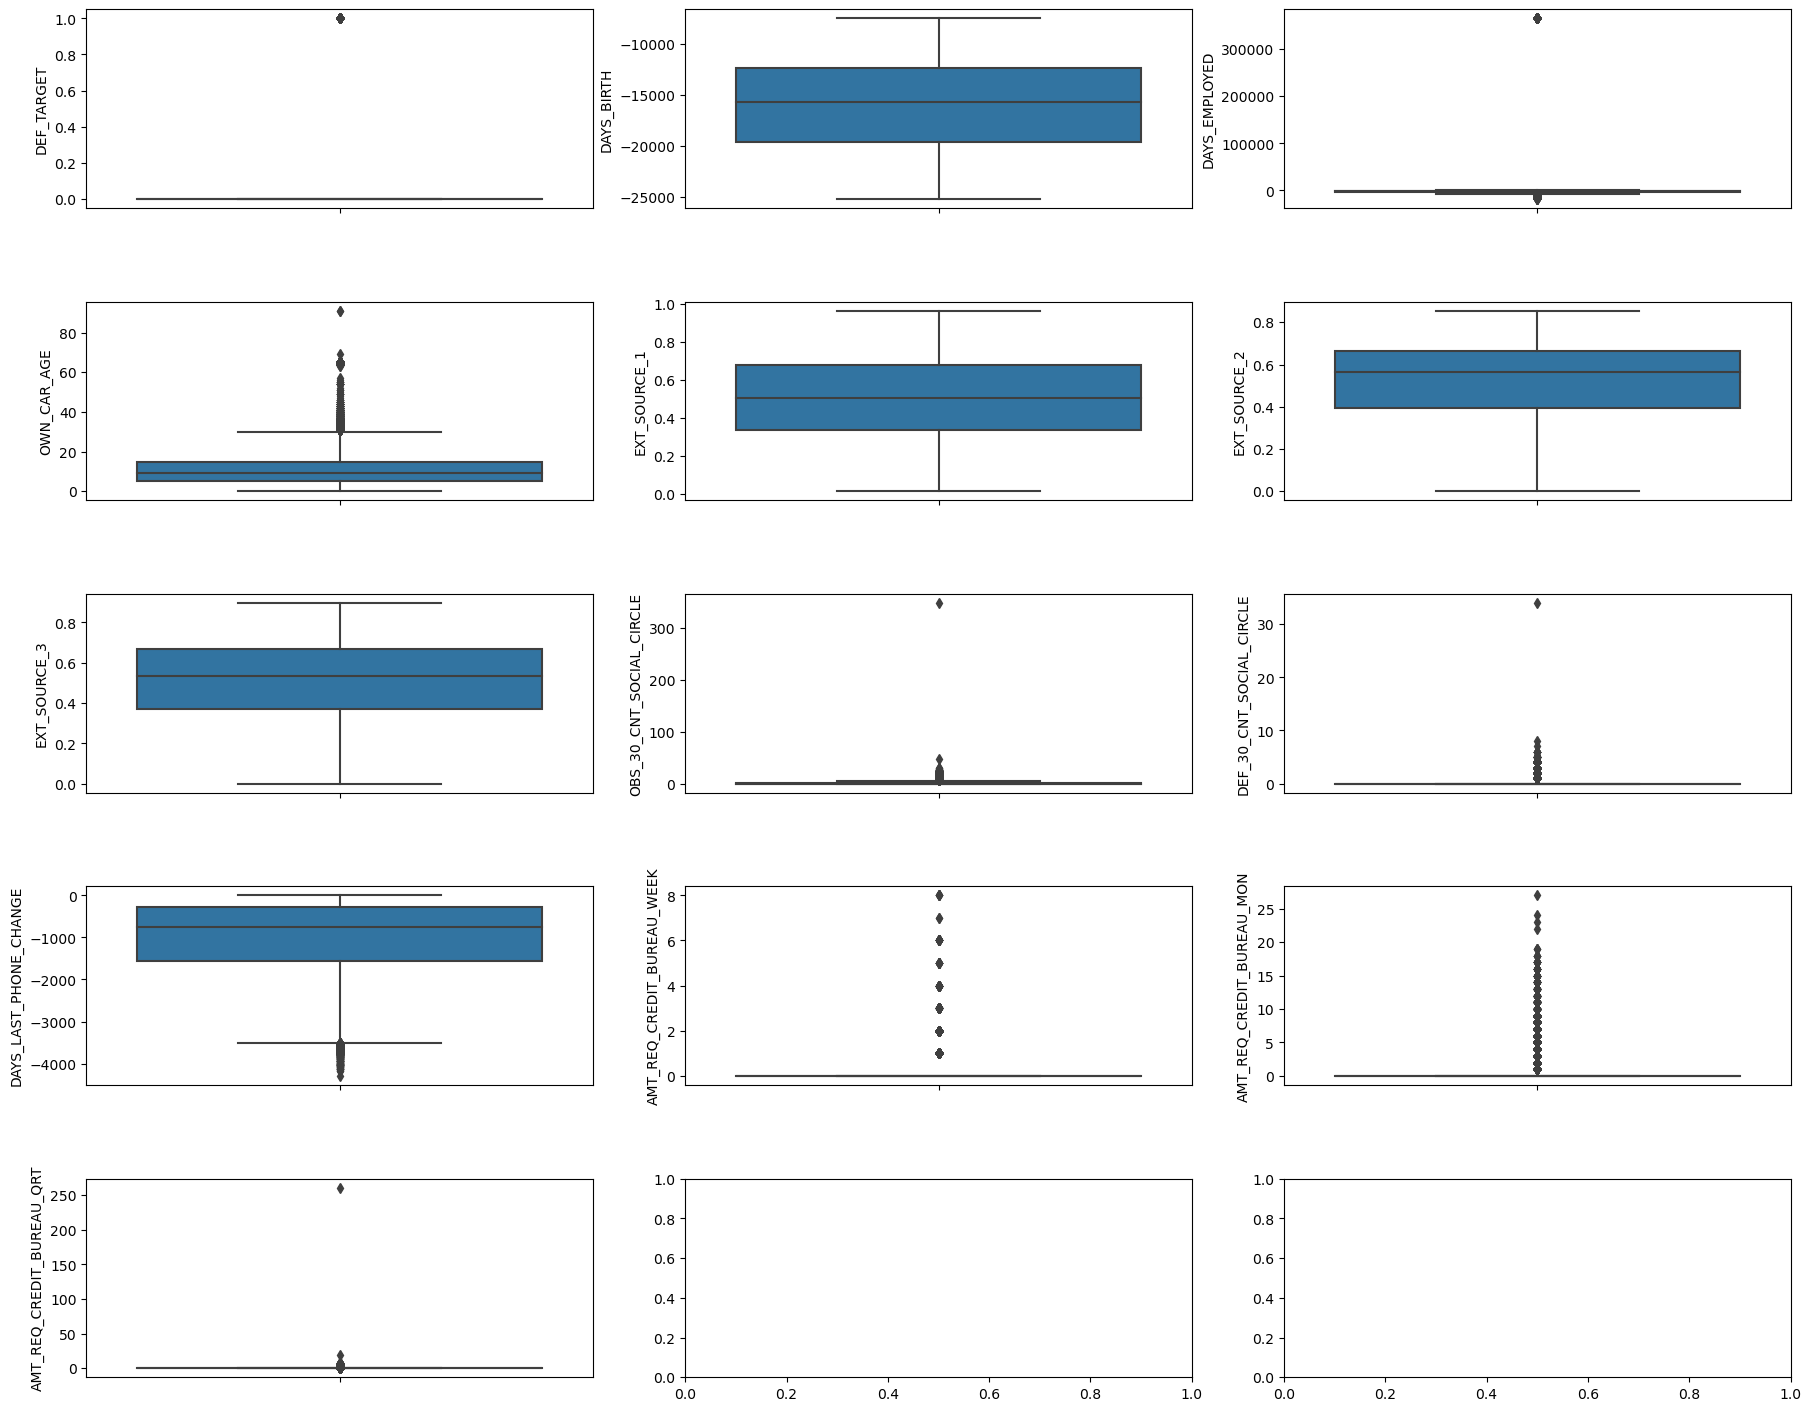

In [20]:
# Boxplot: Visualizing the numeric data dispersion
fig, axs = plt.subplots(ncols=3, nrows=5, figsize=(18, 14))
index = 0
axs = axs.flatten()
    
for i,v in data_num.items():
    sns.boxplot(y=i, data=data_num, ax=axs[index], orient="tight")
    index += 1
    plt.tight_layout(pad=0.3, w_pad=0.5, h_pad=6.0)
    


Definitely, there are some outliers in the variables 'OWN_CAR_AGE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'DAYS_EMPLOYED', 'AMT_REQ_CREDIT_BUREAU_MON', and 'AMT_REQ_CREDIT_BUREAU_QRT'. Let’s detect and solve them.

In [21]:
print('Age of client\'s car:')
print(df.OWN_CAR_AGE.describe())
print('-------------------------------------------------------------------------')

print('Observation of client\'s social surroundings with observable 30 DPD (days past due) default:')
print(df.OBS_30_CNT_SOCIAL_CIRCLE.describe())
print('-------------------------------------------------------------------------')

print('Observation of client\'s social surroundings defaulted on 30 DPD (days past due):')
print(df.DEF_30_CNT_SOCIAL_CIRCLE.describe())
print('-------------------------------------------------------------------------')

print('Days before application did client change phone:')
print(df.DAYS_LAST_PHONE_CHANGE.describe())
print('-------------------------------------------------------------------------')

print('Days before the application the person started current employment:')
print(df.DAYS_EMPLOYED.describe())
print('-------------------------------------------------------------------------')

print('Number of enquiries to Credit Bureau about the client one month before application (excluding one day before application):')
print(df.AMT_REQ_CREDIT_BUREAU_MON.describe())
print('-------------------------------------------------------------------------')

print('Number of enquiries to Credit Bureau about the client 3 months before application (excluding one day before application):')
print(df.AMT_REQ_CREDIT_BUREAU_QRT.describe())
print('-------------------------------------------------------------------------')

Age of client's car:
count    104582.000000
mean         12.061091
std          11.944812
min           0.000000
25%           5.000000
50%           9.000000
75%          15.000000
max          91.000000
Name: OWN_CAR_AGE, dtype: float64
-------------------------------------------------------------------------
Observation of client's social surroundings with observable 30 DPD (days past due) default:
count    306490.000000
mean          1.422245
std           2.400989
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         348.000000
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64
-------------------------------------------------------------------------
Observation of client's social surroundings defaulted on 30 DPD (days past due):
count    306490.000000
mean          0.143421
std           0.446698
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          34.000000
Name: DEF_30_CNT_SOCIAL_C

### Defining a function to visualize boxplot whiskers 

In [22]:
# boxplot and histogram charts
def boxhist(x):
    variable = df[x]
    np.array(variable).mean()
    np.median(variable)
    
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (0.5, 2)})
    mean=np.array(variable).mean()
    median=np.median(variable)
    
    sns.boxplot(variable, ax=ax_box)
    ax_box.axvline(mean, color='r', linestyle='--')
    ax_box.axvline(median, color='g', linestyle='-')

    sns.distplot(variable, ax=ax_hist)
    ax_hist.axvline(mean, color='r', linestyle='--')
    ax_hist.axvline(median, color='g', linestyle='-')

    plt.title(x, fontsize=12, loc="right")
    plt.legend({'Mean':mean,'Median':median})
    ax_box.set(xlabel='')
    plt.show()

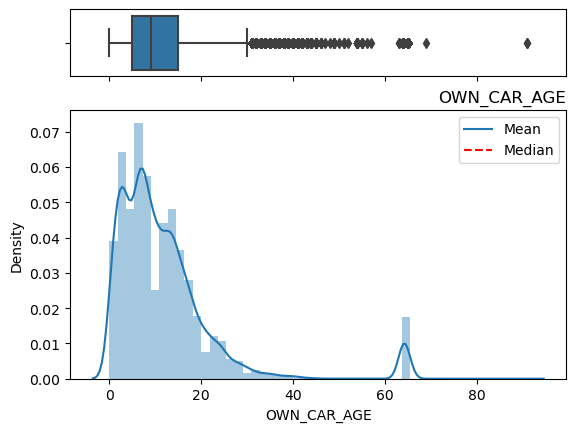

In [23]:
#check outliers of column OWN_CAR_AGE
boxhist('OWN_CAR_AGE')

The graph and the boxplot suggests this variable has too many data points outside the upper quartile. Outliers are plotted as those individual points beyond the boxplot whiskers. The method used here is the **IQR score**.

count    99650.000000
mean         9.936006
std          6.687036
min          0.000000
25%          4.000000
50%          9.000000
75%         14.000000
max         30.000000
Name: OWN_CAR_AGE, dtype: float64


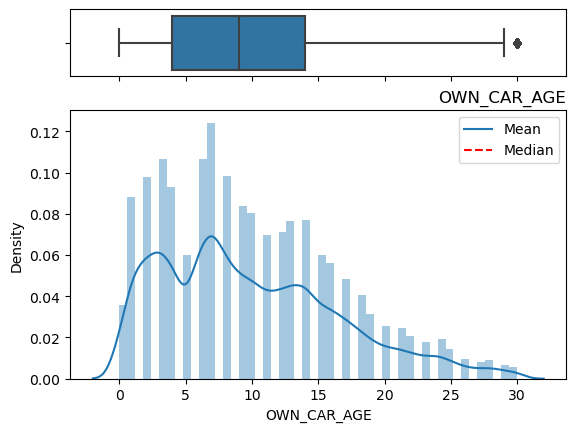

In [24]:
# Dealing with the outliers through IQR score method

Q1 = df['OWN_CAR_AGE'].quantile(0.25)
Q3 = df['OWN_CAR_AGE'].quantile(0.75)

IQR = Q3 - Q1

df['OWN_CAR_AGE'] = df.OWN_CAR_AGE[~((df.OWN_CAR_AGE < (Q1 - 1.5 * IQR)) |(df.OWN_CAR_AGE > (Q3 + 1.5 * IQR)))]

print(df.OWN_CAR_AGE.describe())

boxhist("OWN_CAR_AGE")

In [25]:
print(int(data_num.OWN_CAR_AGE.describe()[0]) - int(df.OWN_CAR_AGE.describe()[0]), "outliers were removed with this operation.")

4932 outliers were removed with this operation.


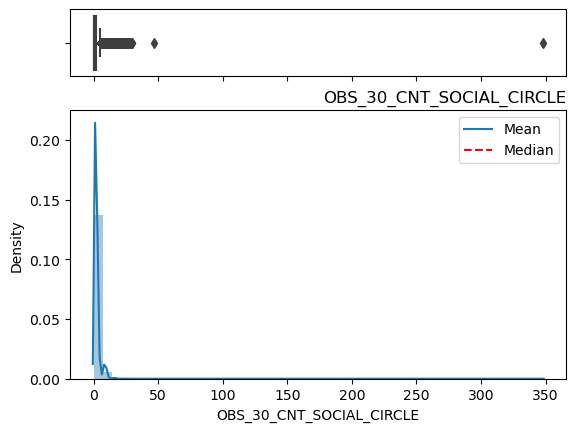

In [26]:
boxhist('OBS_30_CNT_SOCIAL_CIRCLE')

The boxplot analysis and graph both indicate that this variable has a one data point that is outside of the upper quartile.

Although outliers are shown as the individual points outside the boxplot whiskers, not all of the data points outside the lower and upper quartiles are necessarily outliers.

Better investigate it and perhaps eliminate that lone anomaly. 

count    306486.000000
mean          1.420779
std           2.315340
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max          29.000000
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64


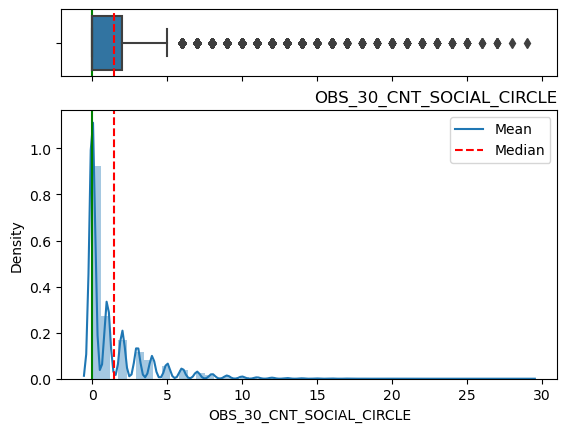

In [27]:
# Dealing with the 348 outlier

value = df.OBS_30_CNT_SOCIAL_CIRCLE.quantile([.99999])

p = value.iloc[0]

df = df[df['OBS_30_CNT_SOCIAL_CIRCLE'] < p]

print(df['OBS_30_CNT_SOCIAL_CIRCLE'].describe())
      
boxhist("OBS_30_CNT_SOCIAL_CIRCLE")

Even though a sizable portion of the data points are outside the upper quartile, I think it is true that those are not outliers because their values are important for the target classification.
not simply removing any others. 

In [28]:
print(int(data_num.OBS_30_CNT_SOCIAL_CIRCLE.describe()[0]) - int(df.OBS_30_CNT_SOCIAL_CIRCLE.describe()[0]),
      "outlier was removed with this operation.")

4 outlier was removed with this operation.


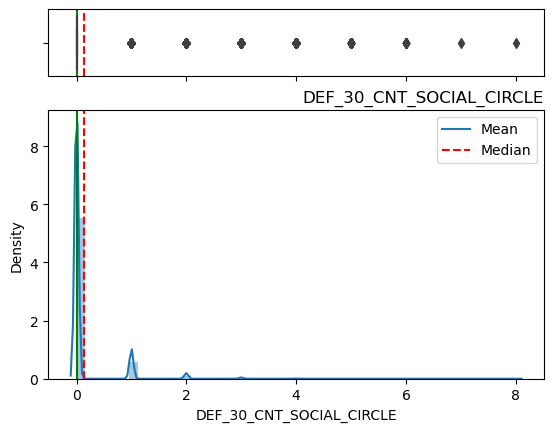

In [29]:
boxhist('DEF_30_CNT_SOCIAL_CIRCLE')

Even though a sizable portion of the data points are outside the upper quartile, I think it is true that those are not outliers because their values are important for the target classification.
not simply removing any others. 

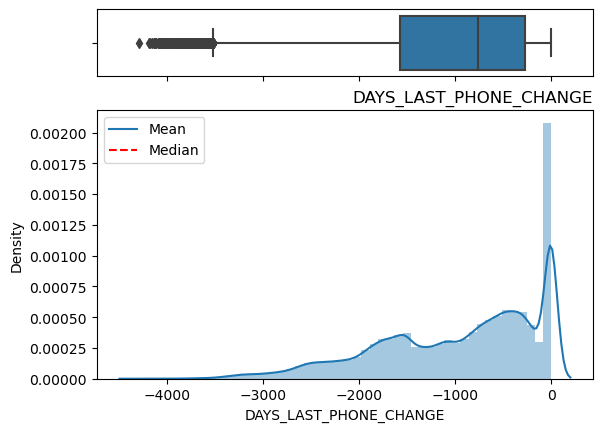

In [30]:
boxhist('DAYS_LAST_PHONE_CHANGE')

The boxplot analysis and graph both indicate that this variable has a some data point that is outside of the lower quartile.

count    306054.000000
mean       -959.629085
std         821.180904
min       -3514.000000
25%       -1567.000000
50%        -756.000000
75%        -273.000000
max           0.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64


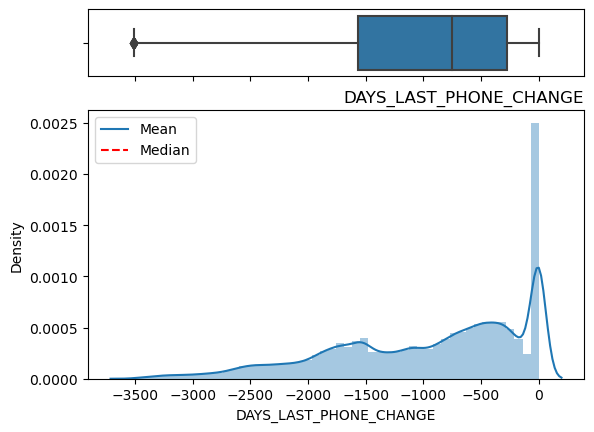

In [31]:
# Dealing with the outliers through IQR score method

Q1 = df['DAYS_LAST_PHONE_CHANGE'].quantile(0.25)
Q3 = df['DAYS_LAST_PHONE_CHANGE'].quantile(0.75)

IQR = Q3 - Q1

df['DAYS_LAST_PHONE_CHANGE'] = df.DAYS_LAST_PHONE_CHANGE[~((df.DAYS_LAST_PHONE_CHANGE < (Q1 - 1.5 * IQR)) |
                                                           (df.DAYS_LAST_PHONE_CHANGE > (Q3 + 1.5 * IQR)))]

print(df.DAYS_LAST_PHONE_CHANGE.describe())

boxhist("DAYS_LAST_PHONE_CHANGE")

In [32]:
print(int(data_num.OWN_CAR_AGE.describe()[0]) - int(df.OWN_CAR_AGE.describe()[0]), 
      "outliers were removed with this operation.")

5272 outliers were removed with this operation.


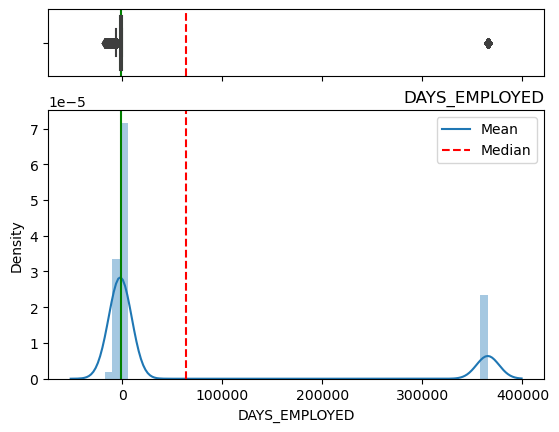

In [33]:
boxhist('DAYS_EMPLOYED')

The boxplot analysis and graph both indicate that this variable has a some data point that is outside of the lower quartile and upper quartile.


count    234484.000000
mean      -1914.083281
std        1497.549341
min       -6466.000000
25%       -2791.000000
50%       -1511.000000
75%        -718.000000
max           0.000000
Name: DAYS_EMPLOYED, dtype: float64


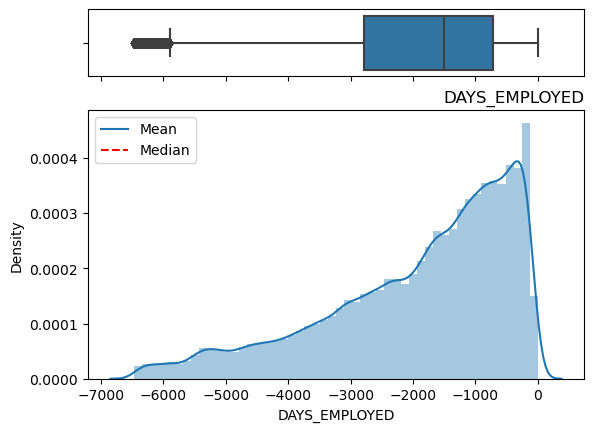

In [34]:
# Dealing with the outliers through IQR score method

Q1 = df['DAYS_EMPLOYED'].quantile(0.25)
Q3 = df['DAYS_EMPLOYED'].quantile(0.75)

IQR = Q3 - Q1

df['DAYS_EMPLOYED'] = df.DAYS_EMPLOYED[~((df.DAYS_EMPLOYED < (Q1 - 1.5 * IQR)) |
                                                           (df.DAYS_EMPLOYED > (Q3 + 1.5 * IQR)))]

print(df.DAYS_EMPLOYED.describe())

boxhist("DAYS_EMPLOYED")

In [35]:
print(int(data_num.DAYS_EMPLOYED.describe()[0]) - int(df.DAYS_EMPLOYED.describe()[0]), 
      "outliers were removed with this operation.")

73027 outliers were removed with this operation.


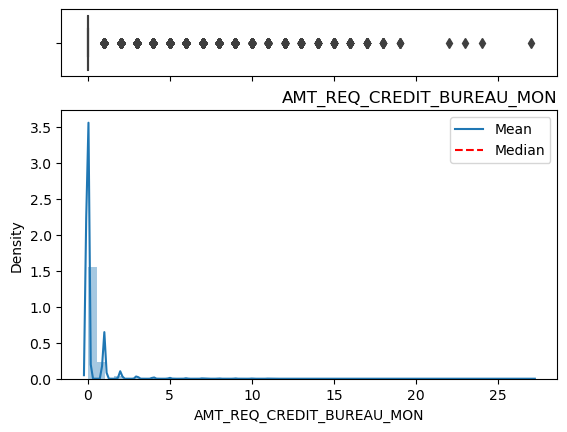

In [36]:
boxhist('AMT_REQ_CREDIT_BUREAU_MON')

count    265134.000000
mean          0.267152
std           0.911867
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          22.000000
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64


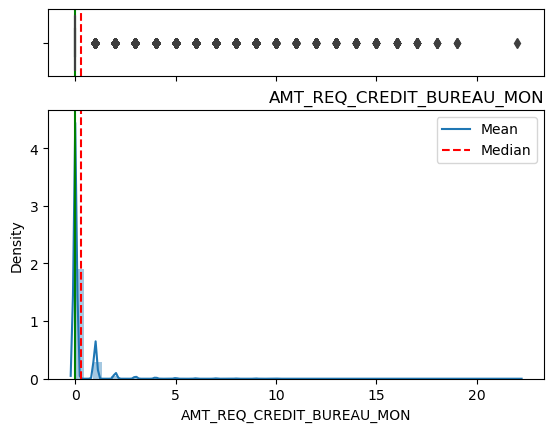

In [37]:
# removing outliers

value = df.AMT_REQ_CREDIT_BUREAU_MON.quantile([.99999])

p = value.iloc[0]

df = df[df['AMT_REQ_CREDIT_BUREAU_MON'] < p]

print(df['AMT_REQ_CREDIT_BUREAU_MON'].describe())
      
boxhist("AMT_REQ_CREDIT_BUREAU_MON")

Even though a sizable portion of the data points are outside the upper quartile, I think it is true that those are not outliers because their values are important for the target classification. not simply removing any others.

In [38]:
print(int(data_num.AMT_REQ_CREDIT_BUREAU_MON.describe()[0]) - int(df.AMT_REQ_CREDIT_BUREAU_MON.describe()[0]), 
      "outliers were removed with this operation.")

858 outliers were removed with this operation.


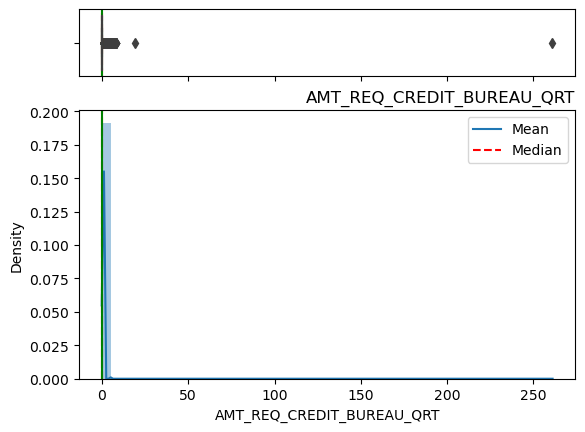

In [39]:
boxhist('AMT_REQ_CREDIT_BUREAU_QRT')

The boxplot analysis and graph both indicate that this variable has a single data point that is outside of the upper quartile.

Although outliers are shown as the individual points outside the boxplot whiskers, not all of the data points outside the lower and upper quartiles are necessarily outliers.


Better investigate it and perhaps eliminate that lone anomaly. 

count    265126.000000
mean          0.264414
std           0.610092
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           7.000000
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64


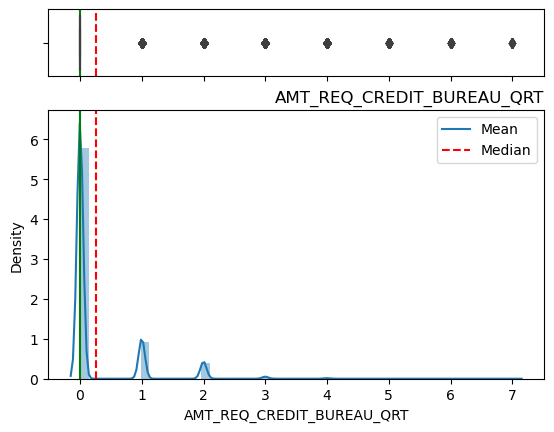

In [40]:
# removing outliers

value = df.AMT_REQ_CREDIT_BUREAU_QRT.quantile([.99999])

p = value.iloc[0]

df = df[df['AMT_REQ_CREDIT_BUREAU_QRT'] < p]

print(df['AMT_REQ_CREDIT_BUREAU_QRT'].describe())
      
boxhist("AMT_REQ_CREDIT_BUREAU_QRT")

In [41]:
print(int(data_num.AMT_REQ_CREDIT_BUREAU_QRT.describe()[0]) - int(df.AMT_REQ_CREDIT_BUREAU_QRT.describe()[0]), 
      "outliers were removed with this operation.")

866 outliers were removed with this operation.


### Descriptive analysis of the features

In [42]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
DEF_TARGET,265126.0,0.077333,0.267120,0.000000,0.000000,0.000000,0.000000,1.000000
DAYS_BIRTH,265126.0,-16116.219424,4309.055494,-25201.000000,-19714.000000,-15811.000000,-12569.000000,-7489.000000
DAYS_EMPLOYED,202172.0,-1954.858482,1509.113265,-6466.000000,-2859.000000,-1561.000000,-742.000000,0.000000
OWN_CAR_AGE,87890.0,9.835203,6.667200,0.000000,4.000000,9.000000,14.000000,30.000000
EXT_SOURCE_1,117261.0,0.506745,0.209932,0.014568,0.340351,0.511850,0.678774,0.962693
EXT_SOURCE_2,264602.0,0.517581,0.189620,0.000001,0.399189,0.569045,0.664958,0.855000
EXT_SOURCE_3,245785.0,0.510775,0.194841,0.000527,0.370650,0.535276,0.669057,0.896010
OBS_30_CNT_SOCIAL_CIRCLE,265126.0,1.430278,2.320614,0.000000,0.000000,0.000000,2.000000,29.000000
DEF_30_CNT_SOCIAL_CIRCLE,265126.0,0.143181,0.441359,0.000000,0.000000,0.000000,0.000000,8.000000
DAYS_LAST_PHONE_CHANGE,264755.0,-982.825186,827.461920,-3514.000000,-1599.000000,-794.000000,-283.000000,0.000000


<a id="three"></a>
## 4. Data Cleaning
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
|This phase is important. This will help to understand patterns in the data, pinpoint any outliers and indicate relationships between variables uusing  descriptive statistics and data visualisations

---


### Let us check if there are any missing values in the data.

In [43]:
round((df.isnull().sum()/df.shape[0])*100,2).astype(str)+ '%'


DEF_TARGET                      0.0%
FLAG_OWN_CAR                    0.0%
NAME_EDUCATION_TYPE             0.0%
DAYS_BIRTH                      0.0%
DAYS_EMPLOYED                 23.74%
OWN_CAR_AGE                   66.85%
ORGANIZATION_TYPE               0.0%
EXT_SOURCE_1                  55.77%
EXT_SOURCE_2                    0.2%
EXT_SOURCE_3                    7.3%
NAME_HOUSING_TYPE               0.0%
OBS_30_CNT_SOCIAL_CIRCLE        0.0%
DEF_30_CNT_SOCIAL_CIRCLE        0.0%
DAYS_LAST_PHONE_CHANGE         0.14%
AMT_REQ_CREDIT_BUREAU_WEEK      0.0%
AMT_REQ_CREDIT_BUREAU_MON       0.0%
AMT_REQ_CREDIT_BUREAU_QRT       0.0%
dtype: object

In [44]:
# droping column OWN_CAR_AGE and EXT_SOURCE_1
data_df = df.drop(['OWN_CAR_AGE', 'EXT_SOURCE_1'], axis =1)

We see that the feature about the age of client's car and EXT_SOURCE_1 has more than 40% of null values, so we can drop these 2 columns since they not going to help us on our analysis because of the amount of null values they have and also manipulating these columns will affect the integrity of our findings

In [45]:
round((data_df.isnull().sum()/data_df.shape[0])*100,2).astype(str)+ '%'

DEF_TARGET                      0.0%
FLAG_OWN_CAR                    0.0%
NAME_EDUCATION_TYPE             0.0%
DAYS_BIRTH                      0.0%
DAYS_EMPLOYED                 23.74%
ORGANIZATION_TYPE               0.0%
EXT_SOURCE_2                    0.2%
EXT_SOURCE_3                    7.3%
NAME_HOUSING_TYPE               0.0%
OBS_30_CNT_SOCIAL_CIRCLE        0.0%
DEF_30_CNT_SOCIAL_CIRCLE        0.0%
DAYS_LAST_PHONE_CHANGE         0.14%
AMT_REQ_CREDIT_BUREAU_WEEK      0.0%
AMT_REQ_CREDIT_BUREAU_MON       0.0%
AMT_REQ_CREDIT_BUREAU_QRT       0.0%
dtype: object

From the above observation we can see that the dataset has null values but since the percentage of null values is low less than 50. Hence the null values can be replaced by the appropriate statistics method (mean, median, or mode) of the column rather than deleting or dropping the column. But here since the columns with nulls is only numerical values we will focus on the mean and mode

In [46]:
# investigating the appropriate statistical method to replace null values with

print('DAYS_EMPLOYED_mean', int(data_df['DAYS_EMPLOYED'].mean()))
print('DAYS_EMPLOYED_median',int(data_df['DAYS_EMPLOYED'].median()))
print('--------------------------------------------------------')

print('EXT_SOURCE_2_mean', round(data_df['EXT_SOURCE_2'].mean(),9))  # round of the 9 decimal places
print('EXT_SOURCE_2_median',round(data_df['EXT_SOURCE_2'].median(),9))
print('--------------------------------------------------------')


print('EXT_SOURCE_3_mean', round(data_df['EXT_SOURCE_3'].mean(),9))  # round of the 9 decimal places
print('EXT_SOURCE_3_median',round(data_df['EXT_SOURCE_3'].median(),9))
print('--------------------------------------------------------')

print('OBS_30_CNT_SOCIAL_CIRCLE_mean', round(data_df['OBS_30_CNT_SOCIAL_CIRCLE'].mean(),0))  # round of the 0 decimal places
print('OBS_30_CNT_SOCIAL_CIRCLE_median',round(data_df['OBS_30_CNT_SOCIAL_CIRCLE'].median(),0))
print('--------------------------------------------------------')

print('DEF_30_CNT_SOCIAL_CIRCLE_mean', round(data_df['DEF_30_CNT_SOCIAL_CIRCLE'].mean(),0))  # round of the 0 decimal places
print('DEF_30_CNT_SOCIAL_CIRCLE_median',round(data_df['DEF_30_CNT_SOCIAL_CIRCLE'].median(),0))
print('--------------------------------------------------------')

print('DAYS_LAST_PHONE_CHANGE_mean', int(data_df['DAYS_LAST_PHONE_CHANGE'].mean()))
print('DAYS_LAST_PHONE_CHANGE_median',int(data_df['DAYS_LAST_PHONE_CHANGE'].median()))
print('--------------------------------------------------------')

print('AMT_REQ_CREDIT_BUREAU_WEEK_mean', round(data_df['AMT_REQ_CREDIT_BUREAU_WEEK'].mean(),0))  # round of the 0 decimal places
print('AMT_REQ_CREDIT_BUREAU_WEEK_median',round(data_df['AMT_REQ_CREDIT_BUREAU_WEEK'].median(),0))
print('--------------------------------------------------------')

print('AMT_REQ_CREDIT_BUREAU_MON_mean', round(data_df['AMT_REQ_CREDIT_BUREAU_MON'].mean(),0))  # round of the 0 decimal places
print('AMT_REQ_CREDIT_BUREAU_MON_median',round(data_df['AMT_REQ_CREDIT_BUREAU_MON'].median(),0))
print('--------------------------------------------------------')


print('AMT_REQ_CREDIT_BUREAU_QRT_mean', round(data_df['AMT_REQ_CREDIT_BUREAU_QRT'].mean(),0))  # round of the 0 decimal places
print('AMT_REQ_CREDIT_BUREAU_QRT_median',round(data_df['AMT_REQ_CREDIT_BUREAU_QRT'].median(),0))

DAYS_EMPLOYED_mean -1954
DAYS_EMPLOYED_median -1561
--------------------------------------------------------
EXT_SOURCE_2_mean 0.517580594
EXT_SOURCE_2_median 0.569044902
--------------------------------------------------------
EXT_SOURCE_3_mean 0.510774997
EXT_SOURCE_3_median 0.53527625
--------------------------------------------------------
OBS_30_CNT_SOCIAL_CIRCLE_mean 1.0
OBS_30_CNT_SOCIAL_CIRCLE_median 0.0
--------------------------------------------------------
DEF_30_CNT_SOCIAL_CIRCLE_mean 0.0
DEF_30_CNT_SOCIAL_CIRCLE_median 0.0
--------------------------------------------------------
DAYS_LAST_PHONE_CHANGE_mean -982
DAYS_LAST_PHONE_CHANGE_median -794
--------------------------------------------------------
AMT_REQ_CREDIT_BUREAU_WEEK_mean 0.0
AMT_REQ_CREDIT_BUREAU_WEEK_median 0.0
--------------------------------------------------------
AMT_REQ_CREDIT_BUREAU_MON_mean 0.0
AMT_REQ_CREDIT_BUREAU_MON_median 0.0
--------------------------------------------------------
AMT_REQ_CREDIT_

Imputation - All the columns that have less than or equal to 40% missing values are imputed based on the datatype. So in this intance we will fill the null values with median since median is not affected by outliers.

In [47]:
# replacing null values with median, 

data_df['DAYS_EMPLOYED'] = data_df['DAYS_EMPLOYED'].fillna(data_df['DAYS_EMPLOYED'].median())
data_df['DAYS_LAST_PHONE_CHANGE'] = data_df['DAYS_LAST_PHONE_CHANGE'].fillna(data_df['DAYS_LAST_PHONE_CHANGE'].median())
data_df['EXT_SOURCE_2'] = data_df['EXT_SOURCE_2'].fillna(data_df['EXT_SOURCE_2'].median())
data_df['EXT_SOURCE_3'] = data_df['EXT_SOURCE_3'].fillna(data_df['EXT_SOURCE_3'].median())
data_df['OBS_30_CNT_SOCIAL_CIRCLE'] = data_df['OBS_30_CNT_SOCIAL_CIRCLE'].fillna(data_df['OBS_30_CNT_SOCIAL_CIRCLE'].median())
data_df['DEF_30_CNT_SOCIAL_CIRCLE'] = data_df['DEF_30_CNT_SOCIAL_CIRCLE'].fillna(data_df['DEF_30_CNT_SOCIAL_CIRCLE'].median())
data_df['AMT_REQ_CREDIT_BUREAU_WEEK'] = data_df['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna(data_df['AMT_REQ_CREDIT_BUREAU_WEEK'].median())
data_df['AMT_REQ_CREDIT_BUREAU_MON'] = data_df['AMT_REQ_CREDIT_BUREAU_MON'].fillna(data_df['AMT_REQ_CREDIT_BUREAU_MON'].median())
data_df['AMT_REQ_CREDIT_BUREAU_QRT'] = data_df['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(data_df['AMT_REQ_CREDIT_BUREAU_QRT'].median())


In [48]:
round((data_df.isnull().sum()/data_df.shape[0])*100,2).astype(str)+ '%'

DEF_TARGET                    0.0%
FLAG_OWN_CAR                  0.0%
NAME_EDUCATION_TYPE           0.0%
DAYS_BIRTH                    0.0%
DAYS_EMPLOYED                 0.0%
ORGANIZATION_TYPE             0.0%
EXT_SOURCE_2                  0.0%
EXT_SOURCE_3                  0.0%
NAME_HOUSING_TYPE             0.0%
OBS_30_CNT_SOCIAL_CIRCLE      0.0%
DEF_30_CNT_SOCIAL_CIRCLE      0.0%
DAYS_LAST_PHONE_CHANGE        0.0%
AMT_REQ_CREDIT_BUREAU_WEEK    0.0%
AMT_REQ_CREDIT_BUREAU_MON     0.0%
AMT_REQ_CREDIT_BUREAU_QRT     0.0%
dtype: object

After imputation of median we can now see that we have no missing values

### Handling duplicate values

In [49]:
# checking for duplicate records
duplicate = data_df.duplicated()
print('number of duplicate records:', duplicate.sum())
data_df[duplicate]

number of duplicate records: 0


,DEF_TARGET,FLAG_OWN_CAR,NAME_EDUCATION_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,NAME_HOUSING_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT


<a id="five"></a>
## 5. Feature selection and feature engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
|  |

---

There are zero duplicate records in the dataset. If they were any duplicated records, they would have been eliminated from dataset.

### Checking the correlation between features

In [50]:
data_df.corr(method='pearson')

,DEF_TARGET,DAYS_BIRTH,DAYS_EMPLOYED,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT
DEF_TARGET,1.000000,0.076737,0.054422,-0.152998,-0.172975,0.010393,0.030245,0.050430,0.000723,-0.012456,-0.002483
DAYS_BIRTH,0.076737,1.000000,0.086541,-0.082968,-0.196970,0.007635,-0.001243,0.073176,-0.001395,0.001484,-0.016180
DAYS_EMPLOYED,0.054422,0.086541,1.000000,-0.078568,-0.083932,-0.004023,0.010131,0.130323,-0.002436,-0.027646,0.006238
EXT_SOURCE_2,-0.152998,-0.082968,-0.078568,1.000000,0.104156,-0.019413,-0.028805,-0.188154,0.001538,0.051794,-0.004682
EXT_SOURCE_3,-0.172975,-0.196970,-0.083932,0.104156,1.000000,-0.000217,-0.035464,-0.070818,-0.020429,-0.008993,-0.023703
OBS_30_CNT_SOCIAL_CIRCLE,0.010393,0.007635,-0.004023,-0.019413,-0.000217,1.000000,0.305148,-0.014273,-0.002543,0.001212,0.004961
DEF_30_CNT_SOCIAL_CIRCLE,0.030245,-0.001243,0.010131,-0.028805,-0.035464,0.305148,1.000000,-0.000706,-0.003557,0.000193,-0.001042
DAYS_LAST_PHONE_CHANGE,0.050430,0.073176,0.130323,-0.188154,-0.070818,-0.014273,-0.000706,1.000000,-0.003362,-0.041164,-0.002830
AMT_REQ_CREDIT_BUREAU_WEEK,0.000723,-0.001395,-0.002436,0.001538,-0.020429,-0.002543,-0.003557,-0.003362,1.000000,-0.014081,-0.019447
AMT_REQ_CREDIT_BUREAU_MON,-0.012456,0.001484,-0.027646,0.051794,-0.008993,0.001212,0.000193,-0.041164,-0.014081,1.000000,-0.011601


In [51]:
data_df_corr = data_df.corr()['DEF_TARGET'][1:] # 1 because is the first column is DEG_TARGET
golden_features_list = data_df_corr[abs(data_df_corr)>0.05].sort_values(ascending=False)
print("There is {} strongly correlated features to the DEF_TARGET:\n{}".format(len(golden_features_list), golden_features_list))

There is 5 strongly correlated features to the DEF_TARGET:
DAYS_BIRTH                0.076737
DAYS_EMPLOYED             0.054422
DAYS_LAST_PHONE_CHANGE    0.050430
EXT_SOURCE_2             -0.152998
EXT_SOURCE_3             -0.172975
Name: DEF_TARGET, dtype: float64


<AxesSubplot:>

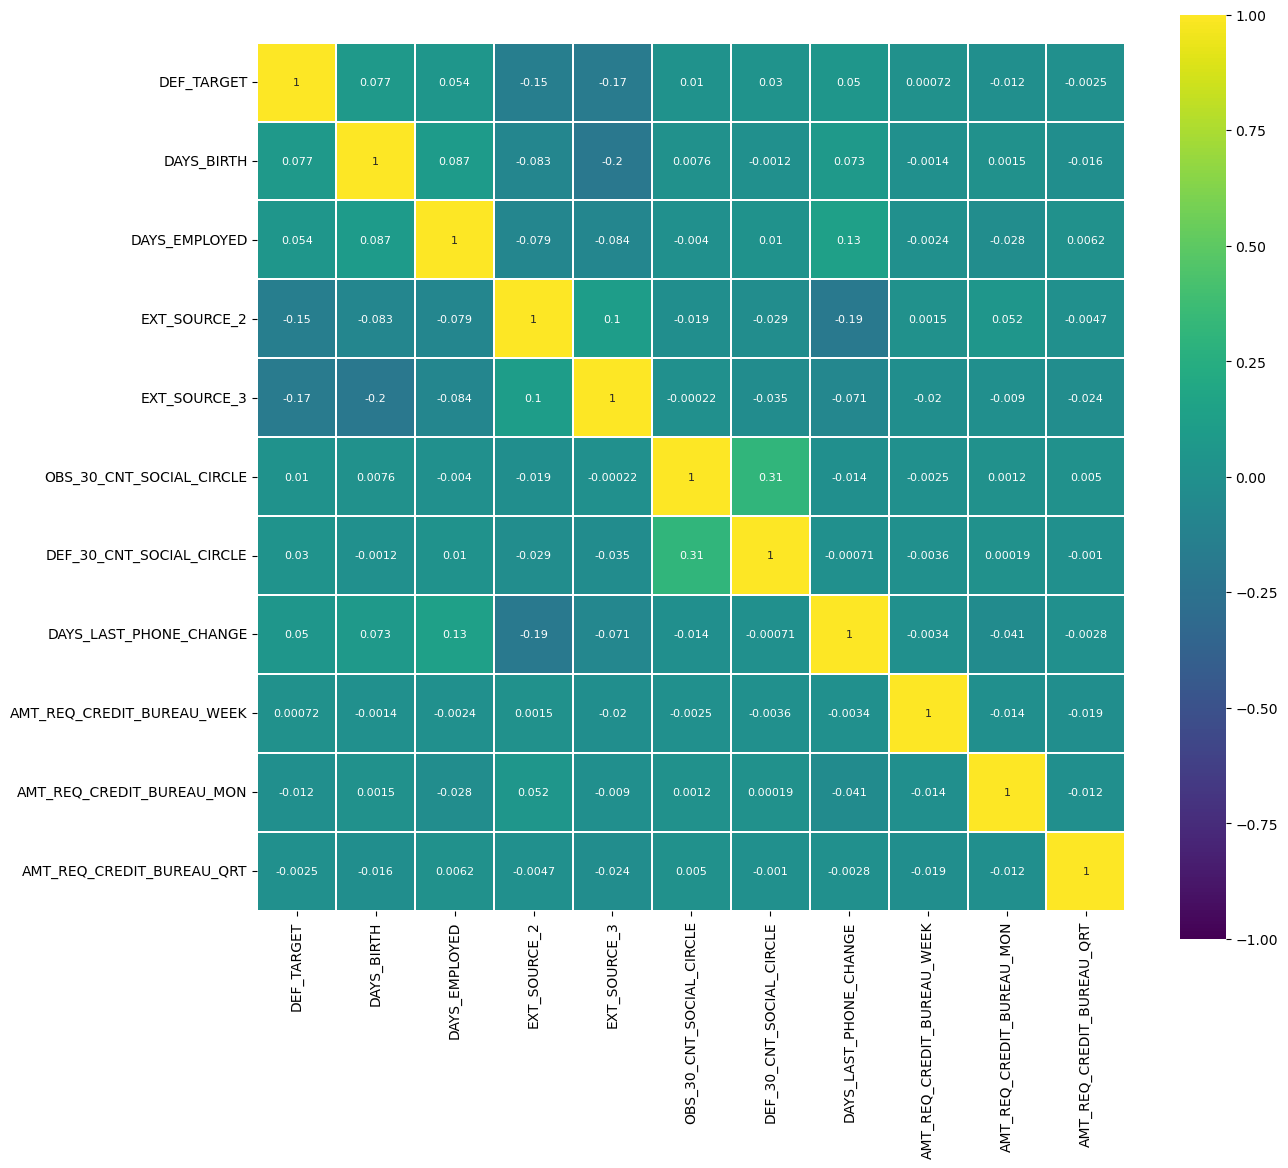

In [52]:
corr = data_df.corr()

plt.figure(figsize=(14,12))

sns.heatmap(corr, cmap ='viridis', vmax =1.0, vmin =-1.0, linewidths = 0.2,
            annot=True, annot_kws = {"size": 8}, square=True)

The heatmap shows there are some positive and negative correlations amongst variables.

It is easy to understand that the variables ‘DEF_30_CNT_SOCIAL_CIRCLE’ and ‘OBS_30_CNT_SOCIAL_CIRCLE’ are the two most correlated features with the highest monotonic relationship (31%). 

Let’s now find out which numerical features are the most correlated with the target.

In [53]:
loan_default_c = pg.pairwise_corr(data_df, columns=['DEF_TARGET'], method='pearson').loc[:,['X','Y','r']]

loan_default_c.sort_values(by=['r'], ascending=False)

,X,Y,r
0,DEF_TARGET,DAYS_BIRTH,0.076737
1,DEF_TARGET,DAYS_EMPLOYED,0.054422
6,DEF_TARGET,DAYS_LAST_PHONE_CHANGE,0.050430
5,DEF_TARGET,DEF_30_CNT_SOCIAL_CIRCLE,0.030245
4,DEF_TARGET,OBS_30_CNT_SOCIAL_CIRCLE,0.010393
7,DEF_TARGET,AMT_REQ_CREDIT_BUREAU_WEEK,0.000723
9,DEF_TARGET,AMT_REQ_CREDIT_BUREAU_QRT,-0.002483
8,DEF_TARGET,AMT_REQ_CREDIT_BUREAU_MON,-0.012456
2,DEF_TARGET,EXT_SOURCE_2,-0.152998
3,DEF_TARGET,EXT_SOURCE_3,-0.172975


The variable that is most correlated with the target is 'EXT_SOURCE_3' with a weak and negative correlation of -0.172975 folowered by EXT_SOURCE_2 with a weak negative correlation of -0,152998.


also Client's age in days at the time of application (DAYS_BIRTH) is most correlated with the target with a weak and positive correlation of 0.076737.

### Dealing with Imbalanced dataset

Sometimes when the records of a certain class are much more than the other class, our classifier may get biased towards the prediction.



<a href="https://www.researchgate.net/figure/Differences-between-undersampling-and-oversampling_fig1_341164819"><img src="https://www.researchgate.net/profile/Malak-Abdullah/publication/341164819/figure/fig1/AS:895468938727425@1590507840611/Differences-between-undersampling-and-oversampling.ppm" alt="Differences between undersampling and oversampling"/></a>


In this example we are going to deal with imbalanced dataset.

We are going to resample. 

The minority or majority class is up- or down- sampled using this method.
When working with an unbalanced dataset, we can use replacement to oversample the minority class.
Oversampling is the term used for this method.
Undersampling is the process of randomly deleting rows from the majority class in order to match them with the minority class.
We can obtain a balanced dataset for both the majority and minority classes after sampling the data.
Thus, we may assume that the classifier will assign each class equal weight when both classes have a comparable amount of records in the dataset. 

In [54]:
# class count
class_count_0, class_count_1 = data_df['DEF_TARGET'].value_counts()

#separate class
class_0 = data_df[data_df['DEF_TARGET']==0]
class_1 = data_df[data_df['DEF_TARGET']==1]

#print the shape of the class
print('Target 0:', class_0.shape)
print('Target 1:', class_1.shape)

Target 0: (244623, 15)
Target 1: (20503, 15)


We will use oversampling since it does not decrease the size of the dataset and does not loose any information on the data set

In [55]:
# upsample minority class
df_minority_upsampled = resample(class_1, 
                                 replace=True,    # sample with replacement
                                 n_samples= 244623, # to match majority class
                                 random_state=42)  # reproducible results

# Combine majority class with upsampled minority class
data = pd.concat([df_minority_upsampled, class_0])

<AxesSubplot:title={'center':'Distribution of loan Default/ not Default after resampled'}>

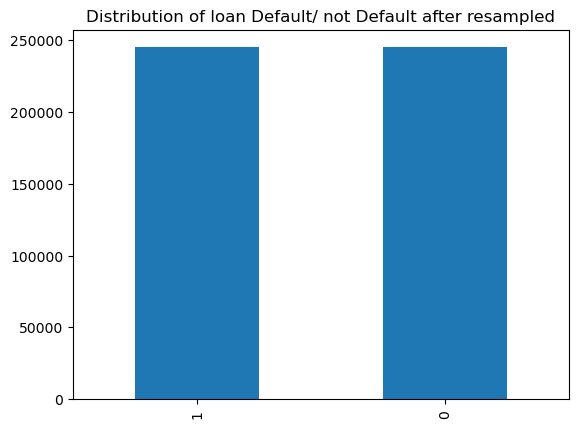

In [56]:
data['DEF_TARGET'].value_counts().plot(kind = 'bar', title = 'Distribution of loan Default/ not Default after resampled' )

In [57]:
# check the shape of the dataset after oversampling
data.shape

(489246, 15)

### ENCODING & TRANSFORMATIONS

Encoding and transforming the categorical variables into numeric ones.

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 489246 entries, 235887 to 307510
Data columns (total 15 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   DEF_TARGET                  489246 non-null  int64  
 1   FLAG_OWN_CAR                489246 non-null  object 
 2   NAME_EDUCATION_TYPE         489246 non-null  object 
 3   DAYS_BIRTH                  489246 non-null  int64  
 4   DAYS_EMPLOYED               489246 non-null  float64
 5   ORGANIZATION_TYPE           489246 non-null  object 
 6   EXT_SOURCE_2                489246 non-null  float64
 7   EXT_SOURCE_3                489246 non-null  float64
 8   NAME_HOUSING_TYPE           489246 non-null  object 
 9   OBS_30_CNT_SOCIAL_CIRCLE    489246 non-null  float64
 10  DEF_30_CNT_SOCIAL_CIRCLE    489246 non-null  float64
 11  DAYS_LAST_PHONE_CHANGE      489246 non-null  float64
 12  AMT_REQ_CREDIT_BUREAU_WEEK  489246 non-null  float64
 13  AMT_REQ_C

We will transform 'FLAG_OWN_CAR', 'NAME_EDUCATION_TYPE', 'ORGANIZATION_TYPE', 'NAME_HOUSING_TYPE' but we need to inspect and decide which procedure ( One hot encoding(OHE) or Binary Encoding) is the best option.

In [59]:
df_own_car = data.FLAG_OWN_CAR
df_education = data.NAME_EDUCATION_TYPE
df_organization = data.ORGANIZATION_TYPE
df_housing = data.NAME_HOUSING_TYPE

#own car
own_ohe = pd.get_dummies(df_own_car)
bin_enc_own = BinaryEncoder()
own_bin = bin_enc_own.fit_transform(df_own_car)

#education
educ_ohe = pd.get_dummies(df_education)
bin_enc_educ = BinaryEncoder()
educ_bin = bin_enc_educ.fit_transform(df_education)

#organization
org_ohe = pd.get_dummies(df_organization)
bin_enc_org = BinaryEncoder()
org_bin = bin_enc_org.fit_transform(df_organization)

#housing
house_ohe = pd.get_dummies(df_housing)
bin_enc_house = BinaryEncoder()
house_bin = bin_enc_house.fit_transform(df_housing)


In [60]:
print('COLUMNS OHE:')
print('Flag OWN CAR:',own_ohe.shape[1])
print('EDUCATION TYPE:', educ_ohe.shape[1])
print('ORGANIZATION TYPE:', org_ohe.shape[1])
print('HOUSING_TYPE:', house_ohe.shape[1])
print('------------------')
print('COLUMNS Binary')
print('Flag OWN CAR:', own_bin.shape[1])
print('EDUCATION TYPE:', educ_bin.shape[1])
print('ORGANIZATION TYPE:', org_bin.shape[1])
print('HOUSING_TYPE:', house_bin.shape[1])

COLUMNS OHE:
Flag OWN CAR: 2
EDUCATION TYPE: 5
ORGANIZATION TYPE: 58
HOUSING_TYPE: 6
------------------
COLUMNS Binary
Flag OWN CAR: 2
EDUCATION TYPE: 3
ORGANIZATION TYPE: 6
HOUSING_TYPE: 3


From the observation above we can see that Binary encoding is the best option

In [61]:
# Concatenating 4 datasets
df_bin = pd.concat([own_bin,educ_bin, org_bin, house_bin],axis=1)

df_bin.head()

,FLAG_OWN_CAR_0,FLAG_OWN_CAR_1,NAME_EDUCATION_TYPE_0,NAME_EDUCATION_TYPE_1,NAME_EDUCATION_TYPE_2,ORGANIZATION_TYPE_0,ORGANIZATION_TYPE_1,ORGANIZATION_TYPE_2,ORGANIZATION_TYPE_3,ORGANIZATION_TYPE_4,ORGANIZATION_TYPE_5,NAME_HOUSING_TYPE_0,NAME_HOUSING_TYPE_1,NAME_HOUSING_TYPE_2
235887,0,1,0,0,1,0,0,0,0,0,1,0,0,1
13538,0,1,0,0,1,0,0,0,0,1,0,0,0,1
80542,1,0,0,0,1,0,0,0,0,1,1,0,1,0
177756,0,1,0,0,1,0,0,0,1,0,0,0,0,1
167203,0,1,0,0,1,0,0,0,1,0,1,0,0,1


In [62]:
# now concatenating the enconded columns to the original dataset
enc_data = pd.concat([data, df_bin], axis=1)

#Droping FLAG_OWN_CAR, NAME_EDUCATION_TYPE, ORGANIZATION_TYPE, and NAME_HOUSING_TYPE
enc_data.drop(['FLAG_OWN_CAR', 'NAME_EDUCATION_TYPE','ORGANIZATION_TYPE', 'NAME_HOUSING_TYPE'], axis=1, inplace=True)

# Lowering upper characters
enc_data.columns = [x.lower() for x in enc_data.columns]

In [63]:
#viewing the first 5 rows of the dataset
enc_data.head()

,def_target,days_birth,days_employed,ext_source_2,ext_source_3,obs_30_cnt_social_circle,def_30_cnt_social_circle,days_last_phone_change,amt_req_credit_bureau_week,amt_req_credit_bureau_mon,...,name_education_type_2,organization_type_0,organization_type_1,organization_type_2,organization_type_3,organization_type_4,organization_type_5,name_housing_type_0,name_housing_type_1,name_housing_type_2
235887,1,-15284,-1561.0,0.554060,0.100804,0.0,0.0,-1.0,0.0,0.0,...,1,0,0,0,0,0,1,0,0,1
13538,1,-13665,-2558.0,0.454019,0.780144,2.0,0.0,-2251.0,0.0,0.0,...,1,0,0,0,0,1,0,0,0,1
80542,1,-14357,-469.0,0.225497,0.484851,0.0,0.0,-1178.0,0.0,0.0,...,1,0,0,0,0,1,1,0,1,0
177756,1,-14570,-3015.0,0.311169,0.387625,0.0,0.0,-2679.0,0.0,0.0,...,1,0,0,0,1,0,0,0,0,1
167203,1,-11385,-189.0,0.076080,0.659406,3.0,0.0,-901.0,0.0,0.0,...,1,0,0,0,1,0,1,0,0,1


At this point we are ready to train some models on the data

<a id="seven"></a>
## 6. Model training, performance and interpretation
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: using f1 score,accuracy and precision  ⚡ |
| :--------------------------- |
|In this section, create one or more regression models that are able to accurately predict the classification. |


---

### MACHINE LEARNING: Predictive modeling 

We are dealing with a supervised binary problem using classification techniques.

In [64]:
#Split the data into train and test

X=enc_data.drop(['def_target'], axis=1) #features
y=enc_data['def_target'] #Target variable

#80% of the data is used to model training and the 20% for model testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

### Logistic Regression (LR)

In [65]:
#Normalizing the train and test data

scaler_lr = MinMaxScaler()

features_names = X_train.columns
X_train_lr = scaler_lr.fit_transform(X_train)
X_train_lr = pd.DataFrame(X_train, columns = features_names)

X_test_lr = scaler_lr.transform(X_test)
X_test_lr = pd.DataFrame(X_test, columns = features_names)

In [66]:
%%time

lr = LogisticRegression(max_iter = 1000, solver = 'lbfgs', random_state = 42, class_weight = 'balanced')
parameters = {'C':[0.001, 0.01, 0.1, 1, 10, 100]}
clf_lr = GridSearchCV(lr, parameters, cv = 5).fit(X_train, y_train)

Wall time: 40.8 s


In [67]:
clf_lr

GridSearchCV(cv=5,
             estimator=LogisticRegression(class_weight='balanced',
                                          max_iter=1000, random_state=42),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]})

In [68]:
clf_lr.best_estimator_

LogisticRegression(C=0.001, class_weight='balanced', max_iter=1000,
                   random_state=42)

In [69]:
y_pred_lr = clf_lr.predict_proba(X_test)[:,1]
y_pred_lr

array([0.50770888, 0.52681802, 0.52706243, ..., 0.46068401, 0.47295151,
       0.49459919])

### Model optimization

Let’s define a function of the AUC to plot and display the threshold between the true positive rate (TPR) and false positive rate (FPR).

In [70]:
# ROC Curve: Area Under the Curve
def auc_roc_plot(y_test, y_pred):
    fpr, tpr, thresholds = roc_curve(y_test,y_pred)
    roc_auc = auc(fpr, tpr)   
    
    print(roc_auc) 
        
    plt.title('Receiver Operating Characteristic(ROC)')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    

0.5492353789696435


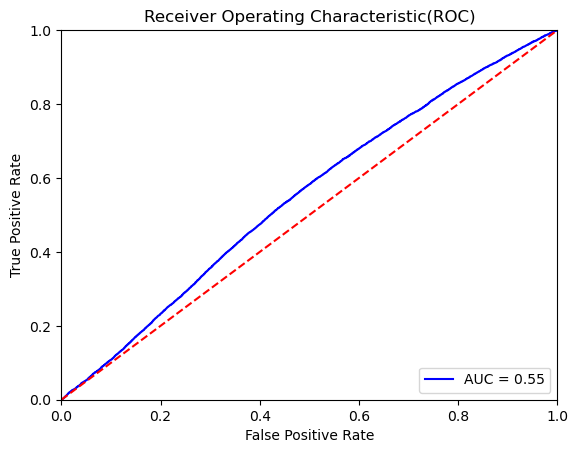

In [71]:
auc_roc_plot(y_test, y_pred_lr)

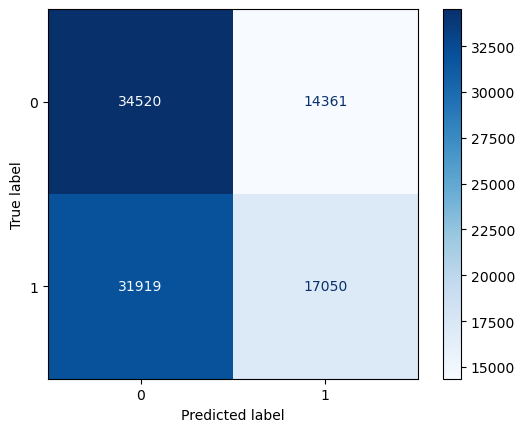

In [72]:
# Confusion Matrix display
plot_confusion_matrix(clf_lr, X_test, y_test, values_format=".6g", cmap="Blues");

#Creating assignments for Final Results
tn, fp, fn, tp = confusion_matrix(y_test == 1, y_pred_lr > 0.5).ravel()
tn_lr = tn
fp_lr = fp
fn_lr = fn
tp_lr = tp

### K-Nearest Neighbours (KNN)

In [73]:
#Normalizing train and test data
scaler_knn = MinMaxScaler()

X_train_knn = scaler_knn.fit_transform(X_train)
X_train_knn = pd.DataFrame(X_train, columns = features_names)

X_test_knn = scaler_knn.transform(X_test)
X_test_knn = pd.DataFrame(X_test, columns = features_names)

In [ ]:
%%time

for k in range(1, 200, 5):
    k = k + 1
    knn = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train)
    acc = knn.score(X_test, y_test)
    
    print('Accuracy for k =', k, ' is:', acc)

In [ ]:
%%time

knn = KNeighborsClassifier(n_neighbors = 47, weights='uniform').fit(X_train, y_train)

In [ ]:
y_pred_knn = knn.predict(X_test)
y_pred_knn

### Model optimization

In [ ]:
auc_roc_plot(y_test, y_pred_knn)

In [ ]:
# Confusion Matrix display

plot_confusion_matrix(knn, X_test, y_test, values_format=".5g", cmap="Blues");

# Creating assignments for Final Results
tn, fp, fn, tp = confusion_matrix(y_test == 1, y_pred_knn > 0.5).ravel()
tn_knn = tn
fp_knn = fp
fn_knn = fn
tp_knn = tp

### Decision Trees (DT)

In [ ]:
from sklearn import tree

In [ ]:
%%time

clf_tree = tree.DecisionTreeClassifier(random_state = 42, max_depth = 10).fit(X_train, y_train)

In [ ]:
clf_tree.score(X_test, y_test)

In [ ]:
# Visualizing features by importance

important_features = pd.DataFrame(data = clf_tree.feature_importances_, index = X_train.columns, columns = ["value"])
important_features.sort_values(by = "value", ascending = False)

In [ ]:
y_pred_dt = clf_tree.predict_proba(X_test)[:,1]
y_pred_dt

## Model optimization

In [ ]:
auc_roc_plot(y_test, y_pred_dt)

In [ ]:
# Confusion Matrix display
plot_confusion_matrix(clf_tree, X_test, y_test, values_format=".5g", cmap="Blues");

# Creating assignments Final Results
tn, fp, fn, tp = confusion_matrix(y_test == 1, y_pred_dt > 0.5).ravel()
tn_dt = tn
fp_dt = fp
fn_dt = fn
tp_dt = tp

### Random Forest (RF)

In [ ]:
%%time

rf = RandomForestClassifier(random_state = 42, class_weight = None).fit(X_train, y_train)
parameters = {'n_estimators':[10, 100, 300, 1000]}
clf_rf = GridSearchCV(rf, parameters, cv = 5).fit(X_train, y_train)

In [ ]:
# Visualizing features by importance

important_features_rf = pd.DataFrame(data = clf_rf.feature_importances_, index = X_train.columns, columns = ["value"])
important_features_rf.sort_values(by = "value", ascending = False)

In [ ]:
y_pred_rf = clf_rf.predict_proba(X_test)[:,1]

### Model optimization

In [ ]:
auc_roc_plot(y_test, y_pred_rf)

In [ ]:
# Confusion Matrxi display

plot_confusion_matrix(clf_rf, X_test, y_test, values_format=".6g", cmap="Blues");

# Creating assignments for Final Results
tn, fp, fn, tp = confusion_matrix(y_test == 1, y_pred_rf > 0.5).ravel()
tn_rf = tn
fp_rf = fp
fn_rf = fn
tp_rf = tp

### RESULTS: Performance comparison between models

In [ ]:
# Creating performance table

results_1 = {'Classifier': ['AUC ROC (%)','TN (%)','FP (%)','FN (%)','TP (%)'],
             'Logistic Regression (LR)': [aucroclr, (tn_lr/97850*100).round(2), 
                                          (fp_lr/97850*100).round(2), (fn_lr/97850*100).round(2), 
                                          (tp_lr/97850*100).round(2)],
             'K Nearest Neighbour (KNN)': [aucrocknn, (tn_knn/97850*100).round(2),(fp_knn/97850*100).round(2), 
                                           (fn_knn/97850*100).round(2),(tp_nn/97850*100).round(2)],
             'Decision Trees (DT)': [aucrocdt, (tn_dt/97850*100).round(2), (fp_dt/97850*100).round(2), 
                                     (fn_dt/97850*100).round(2),(tp_dt/97850*100).round(2)],
             'Random Forest (RF)': [aucrocrf, (tn_rf/97850*100).round(2), (fp_rf/97850*100).round(2), 
                                    (fn_rf/97850*100).round(2),(tp_rf/97850*100).round(2)],
df1 = pd.DataFrame(results_1, columns = ['Classifier', 'Logistic Regression (LR)', 'K Nearest Neighbour (KNN)', 
                                         'Decision Trees (DT)', 'Random Forest (RF)'])
df1.set_index("Classifier", inplace=True)
results = df1.T
results

In [ ]:
# Creating table for graphic visualization
results_2 = {'Classifier': ['ROC AUC'], 
             'Logistic Regression (LR)': [aucroclr], 
             'K Nearest Neighbour (KNN)': [aucrocknn], 
             'Decision Trees (DT)': [aucrocdt], 
             'Random Forest (RF)': [aucrocrf]}
df2 = pd.DataFrame(results_2, columns = ['Classifier', 'Logistic Regression (LR)', 'K Nearest Neighbour (KNN)', 
                                        'Decision Trees (DT)', 'Random Forest (RF)')
df2.set_index("Classifier", inplace=True)
results_2 = df2

In [ ]:
# Display tHe graph
ax = results_2.plot(kind="bar", title=("Evaluating models' performance"), 
                    figsize=(12,8) ,fontsize=10, grid=True)
for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 5), 
                textcoords='offset points')
plt.legend(fontsize=8.5, loc="upper right")
plt.xlabel('')
plt.xticks(rotation='horizontal')
plt.ylabel('Relative frequency (%)')
plt.show()

In [ ]:
# Save best model to file
dump_file = 'random_forest.pkl'
joblib.dump(clf_rf, dump_file, compress=1)
print('\nSaved %s random forest model to file: %s' % (clf_rf, dump_file))

<a id="seven"></a>
## 7. Conclusion
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation and conclusion ⚡ |
| :--------------------------- |
|Is the problem statement solved? |

---

In this Predict we explore different approached to solve the problem statement .We explore different models to predict whether the client will default on a loan or not based on historical data.
Four  models stood out in solving this problem as they are models which have been widely used in classification problems. Models like `Logistic   Regression` ,`K-Nearest Neighbours`,`Decision Tree`, and `Random forest` had high accuracy and f1 score higher than `0.55`. These models produce a more accurate classifications of the loans. We had one dataset which we used to train and test for loan binary classification i.e  clean data,upscaled/downscaled data and the unclean data .While experimenting with the dataset , we discovered that unclean dataset with missing values and annomalies then we cleaned it by (removing missing data more 40%, imputed missing values (less than 40%) with statistical measures, upscaled our dataset as the data on the target feature was highly imbalanced). We feauture engineering in order to understand most important feautures that have highest impact or contribute on the target variable. We have trained the classification models on the dataset and we have found out that random forest(rf) model outperformed all other models with the highestlevel accuracy of prediction which was 99%. With this performance the model can add the highest value to the bank as it will help a lot in maximizing profit while minimizing loss in terms of loans since it can accurately predict if the client will default or not on a loan.  


